In [8]:
import numpy as np
import matplotlib.pyplot as plt

class DiscriminantAnalysis:
    def __init__(self, file_prefix: str):
        self.file_prefix = file_prefix
        self.x1 = self.load_data("1")
        self.x2 = self.load_data("2")
        self.x0 = self.load_data("0")

        self.n1, self.n2, self.n0 = self.x1.shape[0], self.x2.shape[0], self.x0.shape[0]
        self.m = self.x1.shape[1]

        self.mean1 = self.compute_mean(self.x1)
        self.mean2 = self.compute_mean(self.x2)

        self.S1 = self.compute_covariance(self.x1, self.mean1)
        self.S2 = self.compute_covariance(self.x2, self.mean2)

        self.S = self.compute_pooled_covariance(self.S1, self.S2, self.n1, self.n2)
        self.S_inv = np.linalg.inv(self.S)

        self.a = self.compute_discriminant_vector()

        self.f1 = self.project(self.x1)
        self.f2 = self.project(self.x2)
        self.f0 = self.project(self.x0)

        self.m1 = np.mean(self.f1)
        self.m2 = np.mean(self.f2)
        self.f = 0.5 * (self.m1 + self.m2)

        self.res = self.f0 - self.f
        self.classification = self.classify()

    def load_data(self, suffix):
        filename = f"{self.file_prefix}{suffix}.txt"
        return np.loadtxt(filename)

    def compute_mean(self, data):
        return np.mean(data, axis=0)

    def compute_covariance(self, data, mean):
        n = data.shape[0]
        centered = data - mean
        return (1/n) * centered.T @ centered

    def compute_pooled_covariance(self, S1, S2, n1, n2):
        return (1 / (n1 + n2 - 2)) * (n1 * S1 + n2 * S2)

    def compute_discriminant_vector(self):
        return self.S_inv @ (self.mean1 - self.mean2)

    def project(self, data):
        return data @ self.a

    def classify(self):
        if self.m1 > self.m2:
            return ['X1' if r > 0 else 'X2' for r in self.res]
        else:
            return ['X2' if r > 0 else 'X1' for r in self.res]

    def print_results(self):
        print("Проекции x0 - f:")
        print(self.res)
        print("Классификация:")
        print(self.classification)

    def plot(self):
        ff = np.concatenate((self.f1 - self.f, self.f2 - self.f, self.f0 - self.f))
        len1, len2, len3 = len(self.f1), len(self.f2), len(self.f0)
        x1 = np.arange(0, len1)
        x2 = np.arange(len1, len1 + len2)
        x3 = np.arange(len1 + len2, len1 + len2 + len3)

        plt.plot(x1, self.f1 - self.f, 'o', label='f1', color='green')
        plt.plot(x2, self.f2 - self.f, 'o', label='f2', color='red')
        plt.plot(x3, self.f0 - self.f, 'o', label='f0', color='blue')
        plt.axhline(0, color='pink', linewidth=1.5, label='Граница f')
        plt.title('Распределение проекций')
        plt.xlabel('Индекс точки')
        plt.ylabel('Проекция относительно f')
        plt.grid(True)
        plt.legend()
        plt.show()


Проекции x0 - f:
[-5.28672999  2.53163096 20.28539147]
Классификация:
['X2', 'X1', 'X1']


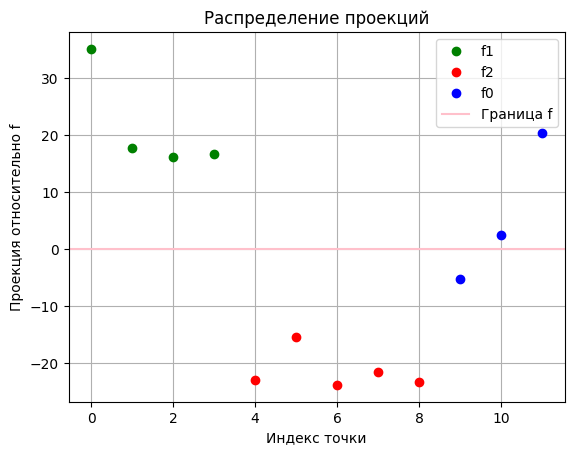

In [9]:
da = DiscriminantAnalysis("test")
da.print_results()
da.plot()